# Supervised Machine Learning: Decision Tree

A decision tree is a type of supervised learning algorithm that can be used in classification as well as regressor problems. The input to a decision tree can be both continuous as well as categorical. The decision tree works on an if-then statement.

1. Initially all the training set is considered as a root. 
2. Feature values are preferred to be categorical, if continuous then they are discretized.
3. Records are distributed recursively on the basis of attribute values. 
4. Which attributes are considered to be in root node or internal node is done by using a statistical approach.

In [32]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
from IPython.display import Image 
from pydot import graph_from_dot_data
import pandas as pd
import numpy as np
from io import StringIO
from sklearn import tree
import matplotlib

## 1. Load Data

In [5]:
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Categorical.from_codes(iris.target, iris.target_names)

In [7]:
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [14]:
y.categories

Index(['setosa', 'versicolor', 'virginica'], dtype='object')

In [15]:
y

[setosa, setosa, setosa, setosa, setosa, ..., virginica, virginica, virginica, virginica, virginica]
Length: 150
Categories (3, object): [setosa, versicolor, virginica]

In [16]:
y = pd.get_dummies(y)

In [18]:
y.head()

,setosa,versicolor,virginica
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

## 2. Decision Tree

In [21]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

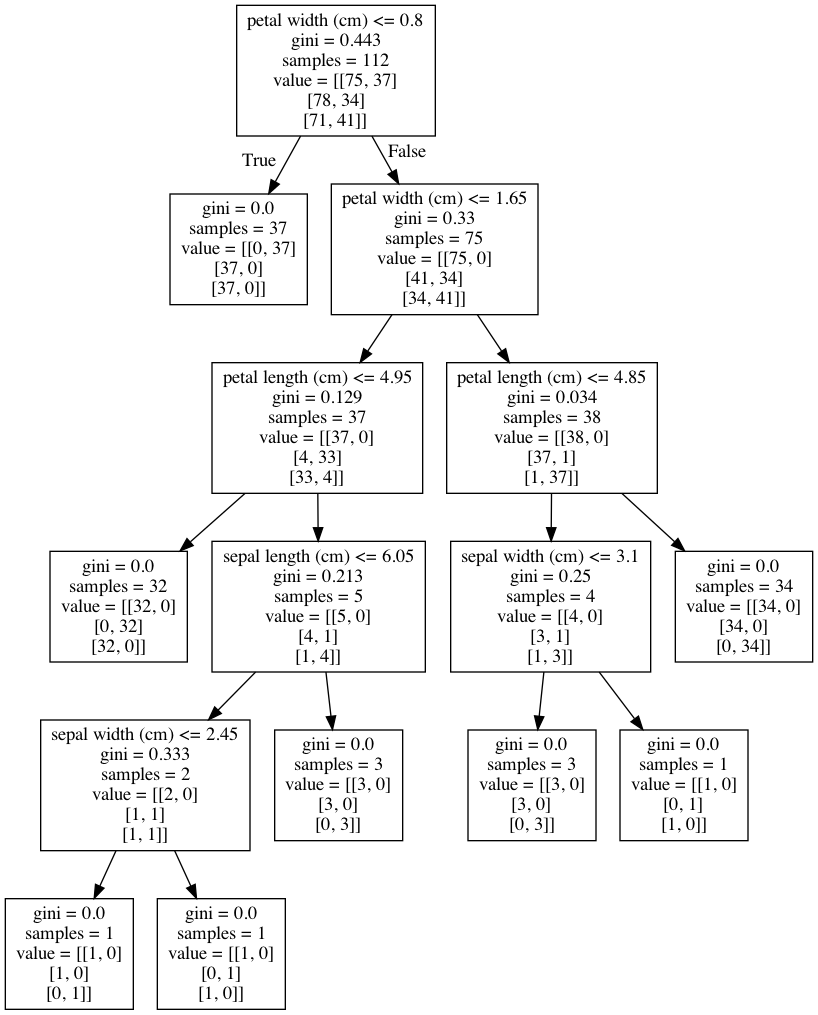

In [31]:
dot_data = StringIO()
export_graphviz(dt, out_file=dot_data, feature_names=iris.feature_names)
(graph, ) = graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())